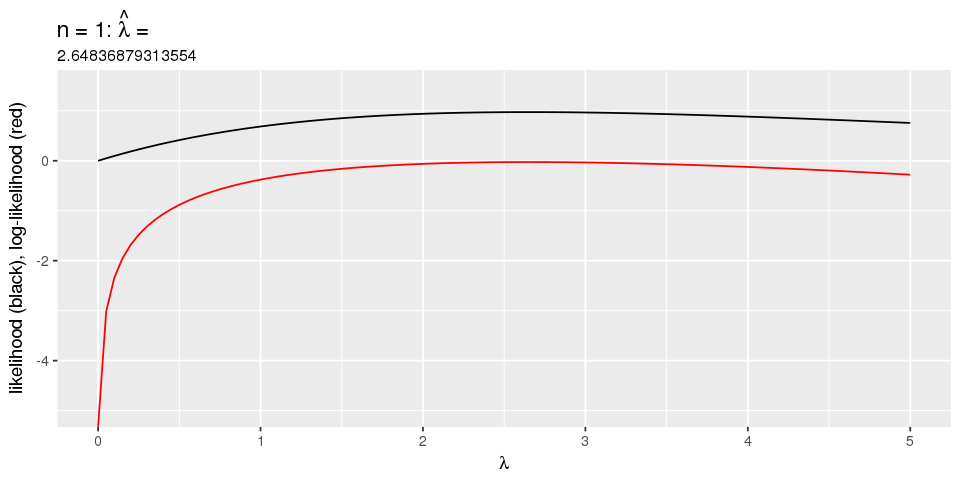

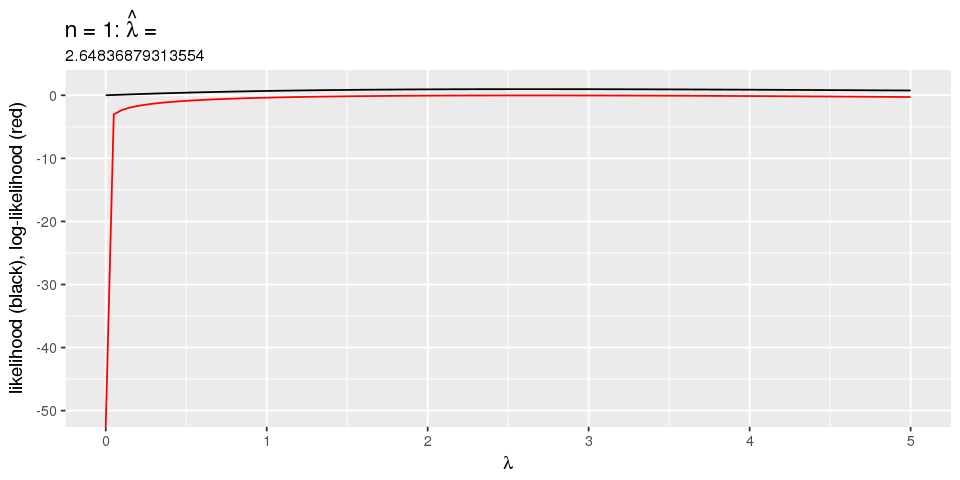

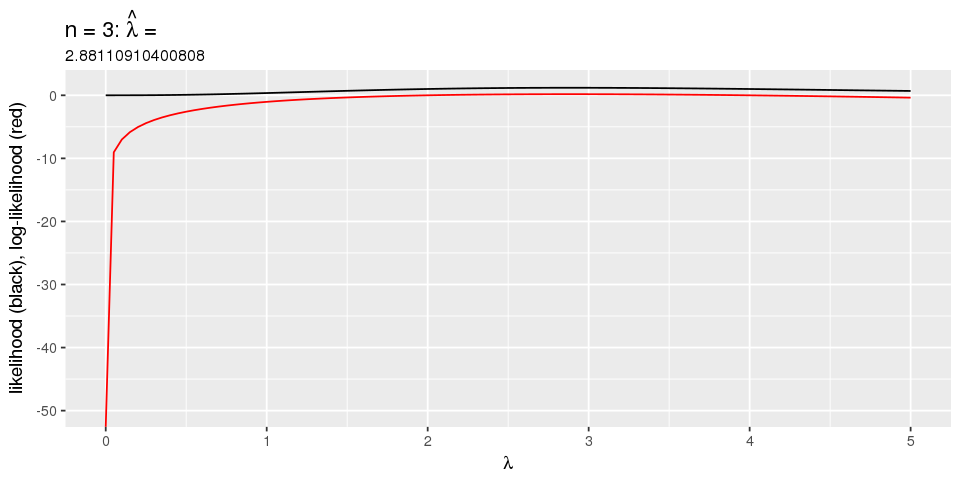

Warning message:
“Removed 35 rows containing missing values (geom_path).”

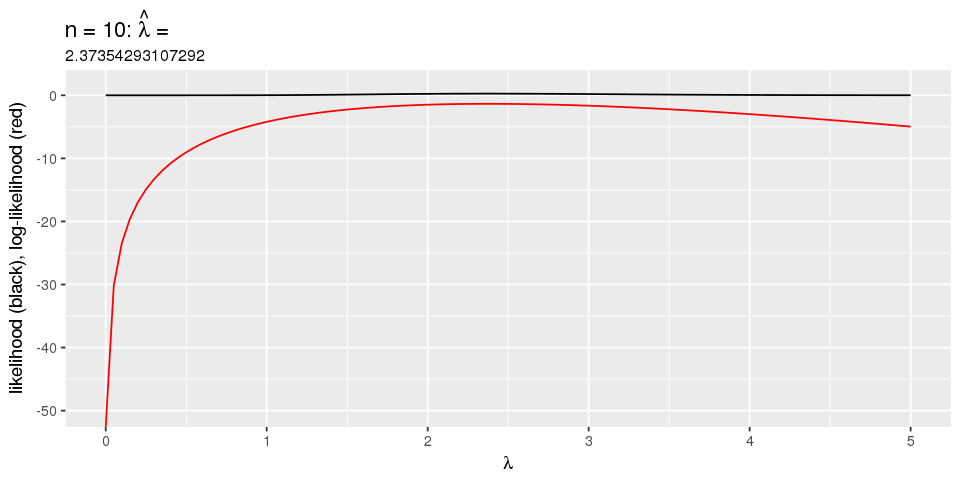

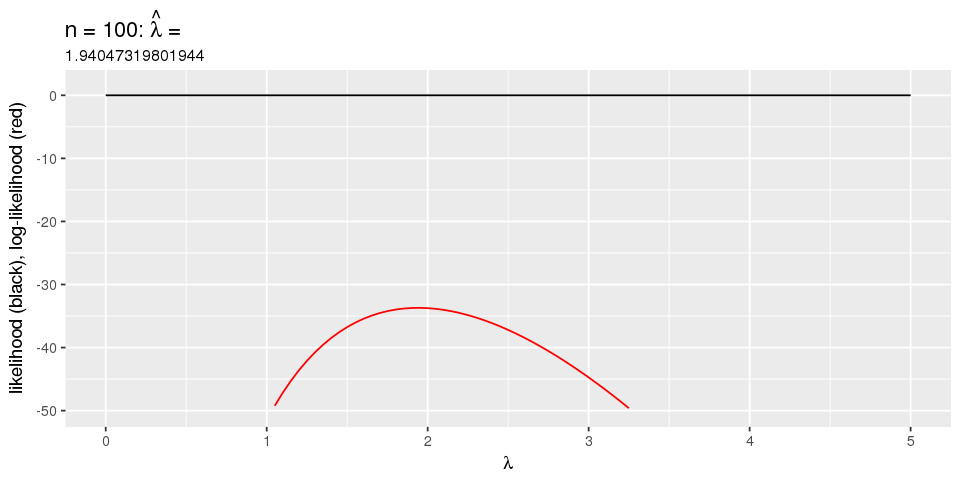

In [1]:
library(ggplot2)
library(repr)

# set output size for plots
options(repr.plot.width=8, repr.plot.height=4)

set.seed(1)

sample_size <- 100

x_obs <- rexp(sample_size, rate = 2)

loglik_fn <- function(x, x_obs, log = TRUE) {
    temp <- sum(dexp(x = x_obs, rate = x, log = TRUE))
    if(log) {
        return(temp)
    } else {
        return(exp(temp))
    }
}

ll_v <- Vectorize(loglik_fn, vectorize.args = "x")

ggplot() +
  stat_function(fun = ll_v, args = list(x_obs = x_obs[1], log = FALSE) , mapping = aes(x = c(0, 5))) +
  stat_function(fun = ll_v, args = list(x_obs = x_obs[1]), mapping = aes(x = c(0, 5)), color = "red") +
  ylim(c(-5, 1.5)) +
  xlab(expression(lambda)) +
  ylab("likelihood (black), log-likelihood (red)") +
  ggtitle(expression(paste("n = 1: ", hat(lambda), " = ", )), 1 / x_obs[1])

ggplot() +
  stat_function(fun = ll_v, args = list(x_obs = x_obs[1], log = FALSE) , mapping = aes(x = c(0, 5))) +
  stat_function(fun = ll_v, args = list(x_obs = x_obs[1]), mapping = aes(x = c(0, 5)), color = "red") +
  ylim(c(-50, 1.5)) +
  xlab(expression(lambda)) +
  ylab("likelihood (black), log-likelihood (red)") +
  ggtitle(expression(paste("n = 1: ", hat(lambda), " = ", )), 1 / x_obs[1])


ggplot() +
  stat_function(fun = ll_v, args = list(x_obs = x_obs[1:3], log = FALSE) , mapping = aes(x = c(0, 5))) +
  stat_function(fun = ll_v, args = list(x_obs = x_obs[1:3]), mapping = aes(x = c(0, 5)), color = "red") +
  ylim(c(-50, 1.5)) +
  xlab(expression(lambda)) +
  ylab("likelihood (black), log-likelihood (red)") +
  ggtitle(expression(paste("n = 3: ", hat(lambda), " = ", )), 1 / mean(x_obs[1:3]))

ggplot() +
  stat_function(fun = ll_v, args = list(x_obs = x_obs[1:10], log = FALSE) , mapping = aes(x = c(0, 5))) +
  stat_function(fun = ll_v, args = list(x_obs = x_obs[1:10]), mapping = aes(x = c(0, 5)), color = "red") +
  ylim(c(-50, 1.5)) +
  xlab(expression(lambda)) +
  ylab("likelihood (black), log-likelihood (red)") +
  ggtitle(expression(paste("n = 10: ", hat(lambda), " = ", )), 1 / mean(x_obs[1:10]))

ggplot() +
  stat_function(fun = ll_v, args = list(x_obs = x_obs[1:100], log = FALSE) , mapping = aes(x = c(0, 5))) +
  stat_function(fun = ll_v, args = list(x_obs = x_obs[1:100]), mapping = aes(x = c(0, 5)), color = "red") +
  ylim(c(-50, 1.5)) +
  xlab(expression(lambda)) +
  ylab("likelihood (black), log-likelihood (red)") +
  ggtitle(expression(paste("n = 100: ", hat(lambda), " = ", )), 1 / mean(x_obs[1:100]))

sample_mean,lambda_hat
0.4473411,2.235431
0.5219509,1.915889
0.4609024,2.169657
0.5270131,1.897486
0.4787346,2.088840
0.4259347,2.347778
0.4966352,2.013550
0.3863542,2.588298
0.7155570,1.397513
0.4725819,2.116035


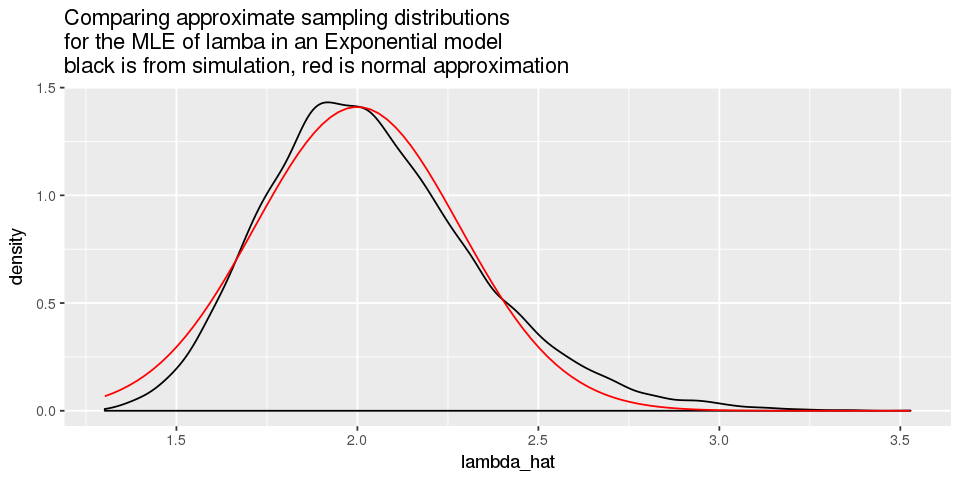

In [2]:
# how many simulations to perform
n_sims <- 10000

# sample size to generate in each simulation
sample_size <- 50

# true lambda
lambda_star <- 2

# initialize a storage vector for the results
# in R, memory allocation in slow, so it's best to create an empty vector before a for loop,
# and then set each element of the vector
simulation_results <- data.frame(
    sample_mean = numeric(n_sims),
    lambda_hat = numeric(n_sims)
)

# a for loop runs the commands between the curly brackets {} multiple times
# in this case, we run these commands once for each value of i in the vector created by seq_len(n_sims)
# it's good practice to create the indices for the loop via seq_len(n_sims) instead of
# something like 1:n_sims because this way the loop will run 0 times if n_sims is 0
# (if n_sims was equal to 0 and you used 1:n_sims, the loop would run twice:
# once for i = 1 and once for i = 0)
for(i in seq_len(n_sims)) {
    x <- rexp(sample_size, rate = lambda_star)
    simulation_results$sample_mean[i] <- mean(x)
    simulation_results$lambda_hat[i] <- 1/mean(x)
}

simulation_results

# Insert code here to make a plot of the simulation results, compared to the approximate normal distribution
# you calculated in part (a) for the sampling distribution of the sample mean.
# Use ggplot, with geom_density to summarize the results of the sample study
# and stat_function to plot the approximate normal distribution.
# There is example code for this in the first problem set.
ggplot(data = simulation_results, mapping = aes(x = lambda_hat)) +
  geom_density() +
  stat_function(fun = dnorm, args = list(mean = lambda_star, sd = sqrt(lambda_star^2 / sample_size)), color = "red") +
  ggtitle("Comparing approximate sampling distributions\nfor the MLE of lamba in an Exponential model\nblack is from simulation, red is normal approximation")


## Approximate bias, variance, and MSE of $\hat{\lambda}_{MLE}$, based on the approximate sampling distribution obtained from simulation

In [3]:
bias <- mean(simulation_results$lambda_hat) - 2
variance <- var(simulation_results$lambda_hat)
mse <- bias^2 + variance

bias
variance
mse


[1] 0.04012354

[1] 0.08644775

[1] 0.08805765